# **Computational Learning and Deep Learning**

## Tensorflow homework (Berta Canal & Adam Olivares)

In [15]:
import numpy as np

import tensorflow as tf

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

The following code downloads the MNIST dataset and adds noise the images.

In [16]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = tf.keras.datasets.mnist.load_data()

In [17]:
mnist_train_images = np.true_divide(mnist_train_images, 255)
mnist_train_images = np.expand_dims(mnist_train_images, axis=3)

mnist_test_images = np.true_divide(mnist_test_images, 255)
mnist_test_images = np.expand_dims(mnist_test_images, axis=3)

In [18]:
noise = np.random.normal(loc=0, scale=0.5, size=mnist_train_images.shape)
mnist_train_images_noisy = mnist_train_images + noise
mnist_train_images_noisy = np.clip(mnist_train_images_noisy, 0., 1.)

noise = np.random.normal(loc=0, scale=0.5, size=mnist_test_images.shape)
mnist_test_images_noisy = mnist_test_images + noise
mnist_test_images_noisy = np.clip(mnist_test_images_noisy, 0., 1.)

#### Exercise:

Define and train an autoencoder neural network with the exact same architecture you used in the PyTorch homework.

Once the model is trainet show the input and ouput of the model for some images in the test set, along with the original image.

Finally, compare the loss metrics between the TensorFlow and Pytorch code bases and check that they are similar.

In [19]:
Autoencoder = tf.keras.Sequential()

# Encoder layers
Autoencoder.add(tf.keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(mnist_train_images_noisy.shape[1:])))
Autoencoder.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
Autoencoder.add(tf.keras.layers.Conv2D(16, kernel_size=3, padding='same', activation='relu'))
Autoencoder.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
Autoencoder.add(tf.keras.layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
Autoencoder.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Decoder layers
Autoencoder.add(tf.keras.layers.Conv2DTranspose(8, kernel_size=3, strides=(2, 2), activation='relu'))
Autoencoder.add(tf.keras.layers.Conv2DTranspose(16, kernel_size=2, strides=(2, 2), activation='relu'))
Autoencoder.add(tf.keras.layers.Conv2DTranspose(32, kernel_size=2, strides=(2, 2), activation='relu'))
Autoencoder.add(tf.keras.layers.Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

Autoencoder.compile(loss="mean_squared_error", optimizer="adam")


In [20]:
Autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 8)          

In [21]:
history = Autoencoder.fit(mnist_train_images_noisy, mnist_train_images, validation_split=0.1, batch_size=16, epochs=2)

Epoch 1/2
3375/3375 [==============================] - 12s 4ms/step - loss: 0.0432 - val_loss: 0.0349
Epoch 2/2
3375/3375 [==============================] - 12s 3ms/step - loss: 0.0307 - val_loss: 0.0290


In [22]:
def loss_plot(history):
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("Model loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train_loss", "Test_loss"], loc="upper left")
    plt.show()

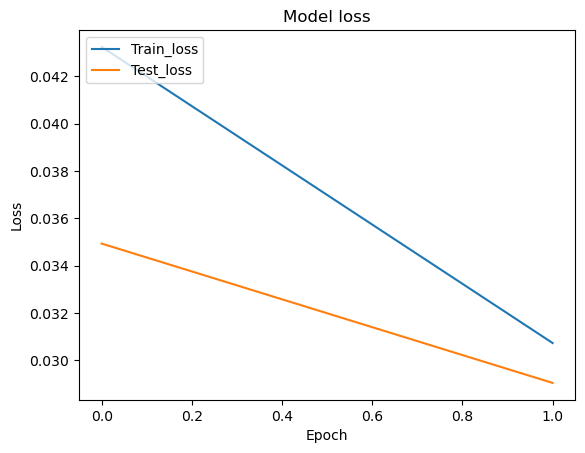

In [23]:
loss_plot(history)

Compared to the Pytorch network we built for Homework 2, the value of the loss we achieved with the keras network on the test set is 0.0288, which is almost identical to the number obtained in the previous homework, where we attained a Test set Average loss of 0.0271.

In [24]:
score = Autoencoder.evaluate(mnist_test_images_noisy, mnist_test_images)
print("Test loss: {}".format(score))

313/313 [==============================] - 1s 2ms/step - loss: 0.0288
Test loss: 0.028759121894836426


1/1 [==============================] - 0s 12ms/step


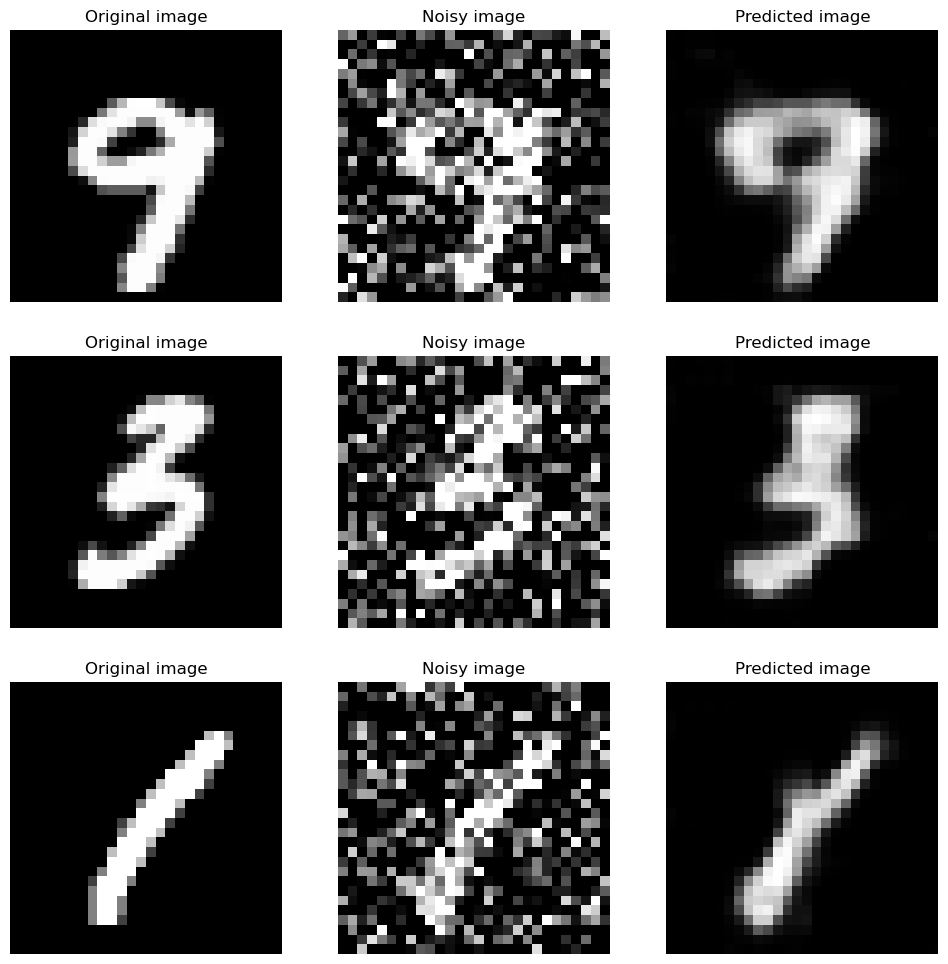

In [26]:
n_images = 3
idx_images = np.random.randint(len(mnist_test_images_noisy), size=n_images)

images = np.stack([mnist_test_images[i] for i in idx_images])
labels = np.stack([mnist_test_labels[i] for i in idx_images])

noisy_images = np.stack([mnist_test_images_noisy[i] for i in idx_images])
noisy_labels = np.stack([mnist_test_labels[i] for i in idx_images])

ncols = n_images
nrows = 3

output = Autoencoder.predict(noisy_images)

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=[4*ncols, 4*nrows])

for i, n in enumerate(idx_images):
    ax[i, 0].imshow(images[i].reshape(28,28), cmap="gray")
    ax[i, 0].set_title("Original image")
    ax[i, 0].axis("off")

    ax[i, 1].imshow(noisy_images[i].reshape(28,28), cmap="gray")
    ax[i, 1].set_title("Noisy image")
    ax[i, 1].axis("off")

    ax[i,2].imshow(output[i].reshape(28,28), cmap="gray")
    ax[i,2].set_title("Predicted image")
    ax[i,2].axis("off")
